In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import itertools

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, svm

import seaborn as sns
%matplotlib inline

# Data extraction

In [106]:
data_substances = pd.read_csv('/home/vaden4d/Documents/Zavd4/PSZ_day.csv', sep=" ")
data_values = pd.read_csv('/home/vaden4d/Documents/Zavd4/METAR_KrR_Intl.csv', sep=" ")

train_substances = data_substances.ix[data_substances.nazva == 'ПСЗ-6'].groupby(['date']).mean().fillna(data_substances.median())
train_values = data_values.groupby(['rh']).mean().ix[train_substances.index]
train_values = train_values.fillna(train_values.median())

In [107]:
train_substances

,TSP,SO2,CO,NO2,NO,H2S,C6H6O,NH3,CH2O
date,,,,,,,,,
2014-01-02,1.00,0.015,2,0.025,0.027,0.0003,0.0010,0.023,0.0060
2014-01-03,1.25,0.020,2,0.067,0.027,0.0015,0.0012,0.038,0.0035
2014-01-04,0.85,0.025,2,0.043,0.027,0.0002,0.0008,0.025,0.0080
2014-01-06,1.00,0.018,3,0.030,0.027,0.0010,0.0010,0.020,0.0040
2014-01-08,0.80,0.016,2,0.030,0.027,0.0013,0.0010,0.027,0.0060
2014-01-09,0.65,0.013,2,0.037,0.027,0.0005,0.0000,0.015,0.0035
2014-01-10,1.30,0.009,2,0.037,0.027,0.0012,0.0010,0.038,0.0060
2014-01-11,0.35,0.015,1,0.037,0.027,0.0002,0.0000,0.035,0.0040
2014-01-13,0.35,0.024,2,0.035,0.027,0.0003,0.0000,0.010,0.0035


In [108]:
train_values

,wd,ws,ceil_hgt,temp,dew_point,atmos_pres
date,,,,,,
2014-01-02,3.395833,510.020833,0.625000,-0.500000,1025.729167,92.250000
2014-01-03,2.607843,338.843137,0.392157,-0.607843,1024.588235,93.000000
2014-01-04,2.375000,360.232143,1.892857,1.482143,1024.839286,97.148214
2014-01-06,3.915254,207.949153,3.067797,2.610169,1020.627119,96.877966
2014-01-08,4.507042,170.408451,2.197183,1.492958,1024.042254,95.247887
2014-01-09,4.981481,952.628571,4.092593,2.777778,1017.814815,91.588889
2014-01-10,6.507463,215.059701,2.417910,2.268657,1010.746269,98.994030
2014-01-11,7.568627,1872.015417,4.156863,-0.294118,1012.058824,73.900000
2014-01-13,8.388889,2591.560976,1.351852,-2.000000,1007.500000,78.757407


In [257]:
critical = 0.003
classes = 3
quantile_arg = [(train_frame['CH2O']/critical).quantile(i/classes) for i in range(1, classes)]

train_substances['Class'] = pd.Series(len(train_substances))
train_substances['Class'].ix[train_substances['CH2O']/critical <= quantile_arg[0]] = 0
train_substances['Class'].ix[(train_substances['CH2O']/critical > quantile_arg[0]) & (train_substances['CH2O']/critical <= quantile_arg[1])] = 1
train_substances['Class'].ix[train_substances['CH2O']/critical > quantile_arg[1]] = 2

/home/vaden4d/tf/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


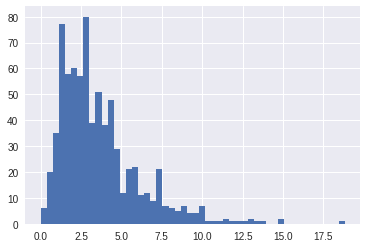

In [111]:
(train_substances['CH2O']/critical).hist(bins=50)

## Fourier modeling

In [50]:
#fourier basis for linear regression
def images_fourier(time, period, degree):
    result = np.array([])
    for i in range(degree):
        result = np.append(result, np.sin(time*2*np.pi*(i+1)/period))
        result = np.append(result, np.cos(time*2*np.pi*(i+1)/period))
    return result.reshape((2*degree, len(time))).T

#evaluate fourier's series on some time interval
def result_fourier(time, period, intercept, coefs, degree):
    S = np.zeros(len(time))
    S += intercept
    for i in range(degree):
        S += coefs[2*i:2*i+2][0]*np.sin(2*np.pi*time*(i+1)/period) + coefs[2*i:2*i+2][1]*np.cos(2*np.pi*time*(i+1)/period)
    return S

#finding mean of the models
def evaluate_model(test_features, alphas):
    test_features = np.array(test_features)
    alphas = np.array(alphas)
    return np.mean(test_features*alphas, axis=0) 

#get_optimal number of sin and cos from fouriers series
def get_degree(time, period, n_train, train_y, plot, max_degree=100):
    plt.figure(plot)
    plt.title('series(degree)')
    degrees = np.array(range(max_degree))
    errors = np.array([])
    for degree in degrees[1:]:
        train_data = images_fourier(time, period, degree)[:n_train]
        model = linear_model.Ridge(alpha=0.3)
        model.fit(train_data, train_y)
        model.predict(train_data)
        test_data = images_fourier(test_time, period, degree)
        errors = np.append(errors, mean_squared_error(model.predict(train_data), train_y))
    plt.plot(degrees[1:], errors, color='red')
    plt.show()

In [51]:
#i empericaly found periods of all y_ch2o/x_i
period_x1 = 2.1815
period_x2 = 2.1815
period_x3 = 2.625

n_data = len(train_frame['CO'])
n_train = 745

test_size = 7
test_ind = 0

n_test_1 = n_train + test_ind + 1
n_test_2 = n_train + test_ind + 1 + test_size

#train and test ch2o
train_f = train_substances['CH2O'][:n_train]
test_f = train_substances['CH2O'][n_test_1:n_test_2]

#train and test features
train_x1 = train_substances['TSP'][:n_train]
train_x2 = train_substances['CO'][:n_train]
train_x3 = train_substances['SO2'][:n_train]

test_x1 = train_substances['TSP'][n_test_1:n_test_2]
test_x2 = train_substances['CO'][n_test_1:n_test_2]
test_x3 = train_substances['SO2'][n_test_1:n_test_2]

#finding y/x_i and liquidation of nans and infs
alpha_x1 = train_substances['CH2O']/train_substances['TSP']
for i in np.where(np.isinf(alpha_x1)):
    alpha_x1[i] = train_substances['CH2O'][i]/1e-1
    
alpha_x2 = train_frame['CH2O']/train_substances['CO']
for i in np.where(np.isinf(alpha_x2)):
    alpha_x2[i] = train_substances['CH2O'][i]/1e-1
    
alpha_x3 = train_substances['CH2O']/train_substances['SO2']
for i in np.where(np.isinf(alpha_x3)):
    alpha_x3[i] = train_substances['CH2O'][i]/1e-1

#train ratios that named alpha_i
train_alpha_x1 = alpha_x1[:n_train]
train_alpha_x2 = alpha_x2[:n_train]
train_alpha_x3 = alpha_x3[:n_train]

test_alpha_x1 = alpha_x1[n_test_1:n_test_2]
test_alpha_x2 = alpha_x2[n_test_1:n_test_2]
test_alpha_x3 = alpha_x3[n_test_1:n_test_2]

#time of fourier's on (0, 3)
time = np.linspace(0, 3, n_data)

train_time = time[:n_train]
test_time = time[n_test_1:n_test_2]

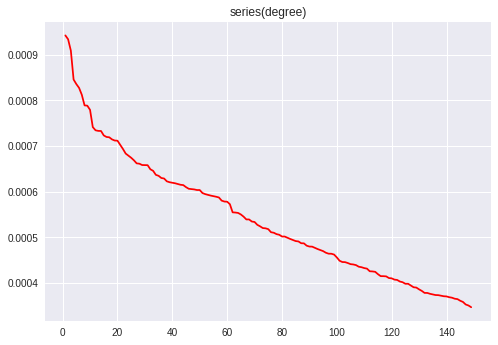

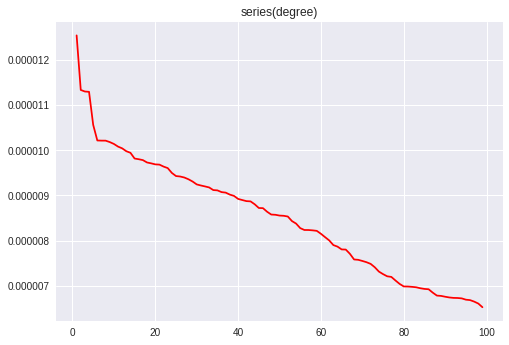

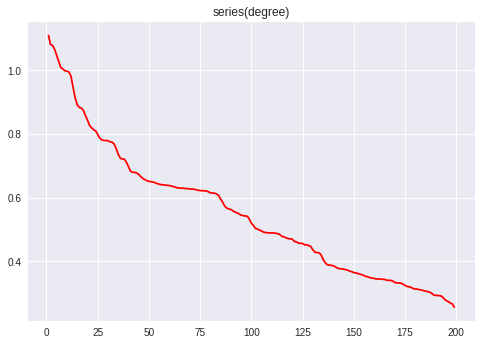

In [52]:
get_degree(time, period_x1, n_train, train_alpha_x1, plot=1, max_degree=150)
get_degree(time, period_x2, n_train, train_alpha_x2, plot=2)
get_degree(time, period_x3, n_train, train_alpha_x3, plot=3, max_degree=200)

In [53]:
#from this plot we can empiricaly find optimal numbers of basis functions
degree_x1 = 60
degree_x2 = 60
degree_x3 = 60

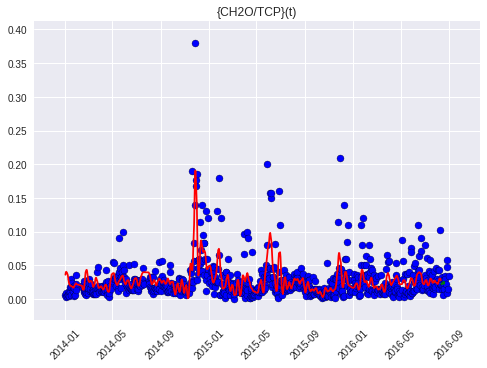

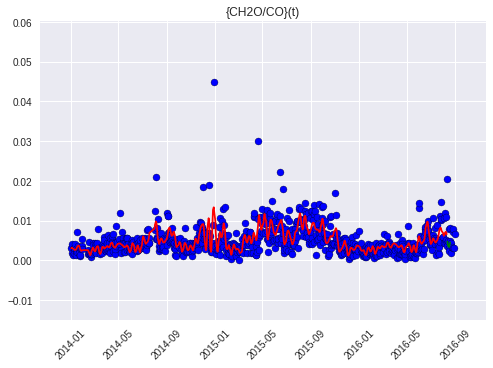

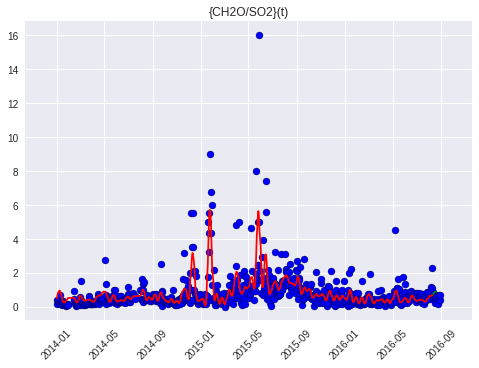

In [54]:
times = [datetime.datetime.strptime(str(i), '%Y-%m-%d') for i in train_frame.index]

#first divisions
train_data = images_fourier(train_time, period_x1, degree_x1)[:n_train]
plt.figure(1)
plt.scatter(times, alpha_x1, edgecolors='black', color='blue')
plt.xticks(rotation='45')
model_x1 = linear_model.Ridge(alpha=0.1)
model_x1.fit(train_data, train_alpha_x1)

plt.plot(times[:n_train], result_fourier(train_time, period_x1, model_x1.intercept_, model_x1.coef_, degree_x1), color='red')
plt.plot(times[n_test_1:n_test_2], result_fourier(test_time, period_x1, model_x1.intercept_, model_x1.coef_, degree_x1), color='green')
plt.title("{CH2O/TCP}(t)")
plt.show()

result_alpha_x1 = result_fourier(test_time, period_x1, model_x1.intercept_, model_x1.coef_, degree_x1)

#second divisions
train_data = images_fourier(train_time, period_x2, degree_x2)[:n_train]
plt.figure(2)
plt.scatter(times, alpha_x2, edgecolors='black', color='blue')
plt.xticks(rotation='45')
model_x2 = linear_model.Ridge(alpha=0.1)
model_x2.fit(train_data, train_alpha_x2)

plt.plot(times[:n_train], result_fourier(train_time, period_x2, model_x2.intercept_, model_x2.coef_, degree_x2), color='red')
plt.plot(times[n_test_1:n_test_2], result_fourier(test_time, period_x2, model_x2.intercept_, model_x2.coef_, degree_x2), color='green')
plt.title("{CH2O/CO}(t)")
plt.show()

result_alpha_x2 = result_fourier(test_time, period_x2, model_x2.intercept_, model_x2.coef_, degree_x2)

#third divisions
train_data = images_fourier(train_time, period_x3, degree_x3)[:n_train]
plt.figure(3)
plt.scatter(times, alpha_x3, edgecolors='black', color='blue')
model_x3 = linear_model.Ridge(alpha=0.1)
plt.xticks(rotation='45')
model_x3.fit(train_data, train_alpha_x3)

plt.plot(times[:n_train], result_fourier(train_time, period_x3, model_x3.intercept_, model_x3.coef_, degree_x3), color='red')
plt.plot(times[n_test_1:n_test_2], result_fourier(test_time, period_x3, model_x3.intercept_, model_x3.coef_, degree_x3), color='green')
plt.title("{CH2O/SO2}(t)")
plt.show()

result_alpha_x3 = result_fourier(test_time, period_x3, model_x3.intercept_, model_x3.coef_, degree_x3)

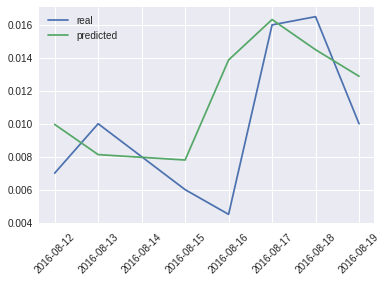

In [316]:
plt.figure()
plt.plot(times[n_test_1:n_test_2], 
         test_f, 
         label="real")
plt.xticks(rotation='45')
plt.plot(times[n_test_1:n_test_2], 
         evaluate_model([test_x1, test_x2, test_x3], [result_alpha_x1, result_alpha_x2, result_alpha_x3]),
         label="predicted")
plt.legend(loc="upper left")
plt.savefig("/home/vaden4d/result.png", dpi=1000)
plt.show()

In [56]:
print("MSE :", mean_squared_error(test_f, evaluate_model([test_x1, test_x2, test_x3], [result_alpha_x1, result_alpha_x2, result_alpha_x3])))
print("r^2 :", r2_score(test_f, evaluate_model([test_x1, test_x2, test_x3], [result_alpha_x1, result_alpha_x2, result_alpha_x3])))

MSE : 1.65354592904e-05
r^2 : 0.132972172038


## SVM

In [304]:
train_data = np.array([
                        train_substances.SO2.rolling(window=3, min_periods=1).median(),
                        train_substances.TSP.rolling(window=2, min_periods=1).median(),
                        train_substances.CO.rolling(window=2, min_periods=1).median(),
                        train_substances.NO2.rolling(window=3, min_periods=1).median(),
                        train_substances.NO.rolling(window=2, min_periods=1).median(),
                        train_substances.H2S.rolling(window=2, min_periods=1).median(),
                        train_substances.C6H6O.rolling(window=2, min_periods=1).median(),
                        train_substances.NH3.rolling(window=3, min_periods=1).median(),
                        train_values.wd.rolling(window=2, min_periods=1).median(),
                        train_values.ws.rolling(window=2, min_periods=1).median(),
                        train_values.temp.rolling(window=2, min_periods=1).median(),
                        train_values.dew_point.rolling(window=2, min_periods=1).median(),
                        train_values.atmos_pres.rolling(window=2, min_periods=1).median(),
                        ]).T

train_labels = train_substances['Class']
train_y = train_substances['CH2O']

In [305]:
train_data = PolynomialFeatures(2).fit_transform(train_data)

train_features, test_features, train_l, test_l = train_test_split(train_data, train_labels, test_size=0.05)

scaler_2 = MinMaxScaler()
scaler_2.fit(train_features)
train_features = scaler_2.fit_transform(train_features)
test_features = scaler_2.fit_transform(test_features)

In [306]:
svm_model = svm.SVC(C=1)
svm_model.fit(train_features, train_l)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [307]:
print("Precision: ", precision_score(test_l, svm_model.predict(test_features), average='macro'))
print("Recall: ", recall_score(test_l, svm_model.predict(test_features), average='macro'))
print("Accuracy: ", accuracy_score(test_l, svm_model.predict(test_features)))

Precision:  0.661414565826
Recall:  0.661111111111
Accuracy:  0.717948717949


In [308]:
confusion_matrix(test_l, svm_model.predict(test_features))

array([[14,  1,  1],
       [ 3,  3,  2],
       [ 0,  4, 11]])

In [309]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

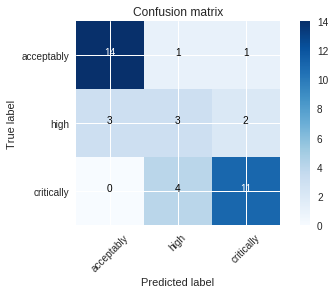

In [317]:
plt.figure()
plot_confusion_matrix(confusion_matrix(test_l, svm_model.predict(test_features)), classes=["acceptably", "high", "critically"])
plt.savefig("/home/vaden4d/conf.png", dpi=1000)
plt.show()

## Polynomial model with a lot of features

In [102]:
train_data = np.array([
                        train_substances.SO2.rolling(window=1, min_periods=1).mean(),
                        train_substances.TSP.rolling(window=1, min_periods=1).mean(),
                        train_substances.CO.rolling(window=1, min_periods=1).mean(),
                        train_values.wd.rolling(window=1, min_periods=1).mean(),
                        train_values.ws.rolling(window=1, min_periods=1).mean(),
                        train_values.temp.rolling(window=1, min_periods=1).mean(),
                        train_values.dew_point.rolling(window=1, min_periods=1).mean(),
                        train_values.atmos_pres.rolling(window=1, min_periods=1).mean(),
                        ]).T

train_labels = train_substances['Class']
train_y = train_substances['CH2O']

In [103]:
train_data = PolynomialFeatures(2).fit_transform(train_data)

train_x, test_x, train_y, test_y = train_test_split(train_data, train_y, test_size=0.4)
train_features, test_features, train_l, test_l = train_test_split(train_data, train_labels, test_size=0.4)
scaler_1 = MinMaxScaler()
scaler_1.fit(train_x)
train_x = scaler_1.fit_transform(train_x)
test_x = scaler_1.fit_transform(test_x)

In [104]:
reg_model = linear_model.Ridge(alpha=0.1)
reg_model.fit(train_x, train_y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [105]:
print("MSE: ", mean_squared_error(test_y, reg_model.predict(test_x)))
print("r2: ", r2_score(test_y, reg_model.predict(test_x)))

MSE:  3.60513870498e-05
r2:  0.159023150056
